# **Installing libraries with its latest version**

In [ ]:
import pandas as pd
import numpy as np
import re
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
from transformers import TrainingArguments, Trainer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# **Importing Dataset**

In [ ]:
file_path='/content/drive/MyDrive/Colab Notebooks/archive.zip'

In [ ]:
df=pd.read_csv(file_path,compression='zip')

In [ ]:
df.head()

,case_id,case_outcome,case_title,case_text
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...


# **Preprocessing the data**

In [ ]:
df['case_text_sum'] = df["case_title"] + df["case_text"]

In [ ]:
df.head()

,case_id,case_outcome,case_title,case_text,case_text_sum
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...,Dr Martens Australia Pty Ltd v Figgins Holding...


In [ ]:
df=df.drop(columns=['case_text'])

In [ ]:
df=df.rename(columns={'case_text_sum':'case_text'})

In [ ]:
df=df.drop(columns=['case_id','case_title'])

In [ ]:
df.head()

,case_outcome,case_text
0,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...
1,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...
2,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...
3,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...
4,cited,Dr Martens Australia Pty Ltd v Figgins Holding...


In [ ]:
df.describe()

,case_outcome,case_text
count,24985,24809
unique,10,24764
top,cited,Gudjala People # 2 v Native Title Registrar [2...
freq,12219,5


In [ ]:
df.case_outcome.value_counts()

case_outcome
cited            12219
referred to       4384
applied           2448
followed          2256
considered        1712
discussed         1024
distinguished      608
related            113
affirmed           113
approved           108
Name: count, dtype: int64

In [ ]:
df.isna().sum()

case_outcome      0
case_text       176
dtype: int64

In [ ]:
df = df.fillna('') #filling of null values with blanks

In [ ]:
df.isna().sum()

case_outcome    0
case_text       0
dtype: int64

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
custom_stopwords=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'ma', 'mightn', "mightn't", 'mustn', 'needn', 'shan', "shan't", 'shouldn', 'wasn', 'weren', 'won']

In [ ]:
import re
from nltk.stem import PorterStemmer

def text_preprocessing(text, custom_stopwords):
    if not isinstance(text, str):
        # Handle non-string elements (e.g., return empty string, skip the sample)
        return ""

    # Lowercase the text (if it's a string)
    text = text.lower()

    # Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)

    #Remove numbers
    text = re.sub(r'\d+','',text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove emails
    text = re.sub(r'\S*@\S*\s?', '', text)

    # Tokenize the text (split into words)
    words = text.split()

    # Remove custom stopwords from the tokenized list
    filtered_words = [word for word in words if word not in custom_stopwords]

    # Stemming
    stemmer = PorterStemmer()
    filtered_words = [stemmer.stem(word) for word in filtered_words]

    # Join tokens back into single string
    text = ' '.join(filtered_words)

    return text
df['clean_case_text']=df['case_text'].apply(lambda x: text_preprocessing(x,custom_stopwords))

In [ ]:
df.head()

,case_outcome,case_text,clean_case_text
0,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,alpin hardwood aust pti ltd v hardi pti ltd no...
1,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,black v lipovac fca alr gener principl govern ...
2,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,colgat palmol co v cusson pti ltd fcr ordinari...
3,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,dai studio pti ltd v bullett creativ pti ltd f...
4,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,dr marten australia pti ltd v figgin hold pti ...


In [ ]:
df1=df.drop(columns=['case_text'])

In [ ]:
df1.head()

,case_outcome,clean_case_text
0,cited,alpin hardwood aust pti ltd v hardi pti ltd no...
1,cited,black v lipovac fca alr gener principl govern ...
2,cited,colgat palmol co v cusson pti ltd fcr ordinari...
3,cited,dai studio pti ltd v bullett creativ pti ltd f...
4,cited,dr marten australia pti ltd v figgin hold pti ...


In [ ]:
df1=df1.rename(columns={'clean_case_text':'case_text'})

In [ ]:
df1.head()

,case_outcome,case_text
0,cited,alpin hardwood aust pti ltd v hardi pti ltd no...
1,cited,black v lipovac fca alr gener principl govern ...
2,cited,colgat palmol co v cusson pti ltd fcr ordinari...
3,cited,dai studio pti ltd v bullett creativ pti ltd f...
4,cited,dr marten australia pti ltd v figgin hold pti ...


# **Train and Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

df_train,df_test = train_test_split(df1,test_size=0.2, shuffle=True,random_state=42)

df_train.shape,df_test.shape

((19988, 2), (4997, 2))

In [ ]:
df_train['case_outcome'].unique()

array(['applied', 'cited', 'referred to', 'considered', 'followed',
       'discussed', 'distinguished', 'affirmed', 'approved', 'related'],
      dtype=object)

# **Define label encoding**

In [ ]:
encoded_dict = {"cited": 0, "referred to": 1, "applied": 2, "followed": 3,
                 "considered": 4, "discussed": 5, 'distinguished': 6,
                 "approved": 7, "related": 8, "affirmed": 9}

In [ ]:
df_train['case_outcome'] = df_train['case_outcome'].map(encoded_dict)
df_test['case_outcome'] = df_test['case_outcome'].map(encoded_dict)

In [ ]:
import torch

# **Convert labels to tensors (PyTorch)**

In [ ]:
# Convert labels to tensors (PyTorch)
y_train = torch.tensor(df_train['case_outcome'].tolist())
y_test = torch.tensor(df_test['case_outcome'].tolist())

In [ ]:
# Load tokenizer and pre-trained model (PyTorch)
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
model = AutoModelForSequenceClassification.from_pretrained('bert-base-cased', num_labels=10)  # 10 for 10 classes


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# **Tokenize the input**

In [ ]:
# Tokenize the input (PyTorch)
max_len = 70
encoding_train = tokenizer(
    text=df_train.case_text.tolist(),
    add_special_tokens=True,
    max_length=max_len,
    truncation=True,
    padding='max_length',
    return_tensors='pt'
)

# **Tokenize testing data**

In [ ]:
encoding_test = tokenizer(
    text=df_test.case_text.tolist(),
    add_special_tokens=True,
    max_length=max_len,
    truncation=True,
    padding='max_length',
    return_tensors='pt'
)

In [ ]:
input_ids_train = encoding_train['input_ids']
attention_mask_train = encoding_train['attention_mask']
input_ids_test = encoding_test['input_ids']
attention_mask_test = encoding_test['attention_mask']

# **Sample a very minimal subset of the data for training**

In [ ]:
subset_size = 100
indices = np.random.choice(len(y_train), subset_size, replace=False)
input_ids_train_subset = input_ids_train[indices]
attention_mask_train_subset = attention_mask_train[indices]
y_train_subset = y_train[indices]

# **Define training function**

In [ ]:
# Define training function
def train(model, optimizer, train_loader, criterion, epochs=3):
    model.train()  # Set model to training mode
    for epoch in range(epochs):
        for input_ids, attention_mask, labels in train_loader:
            optimizer.zero_grad()  # Clear gradients
            outputs = model(input_ids, attention_mask=attention_mask)  # Forward pass
            loss = criterion(outputs.logits, labels)  # Calculate loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights

In [ ]:
batch_size = 32


In [ ]:
import torch.nn as nn

In [ ]:
print(y_train.dtype,y_test.dtype)

torch.int64 torch.int64


In [ ]:
# y_train = y_train.round().long()  # Cast y_train to torch.long type
# y_test = y_test.round().long() # Cast y_train to torch.long type

In [ ]:
min(y_train)

tensor(0)

In [ ]:
print("Unique labels in training data:", df_train['case_outcome'].unique())
print("Encoded labels:", y_train.unique())

Unique labels in training data: [2 0 1 4 3 5 6 9 7 8]
Encoded labels: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [ ]:
print("Unique labels in training data:", df_train['case_outcome'].unique())
print("Label counts in training data:", df_train['case_outcome'].value_counts())


Unique labels in training data: [2 0 1 4 3 5 6 9 7 8]
Label counts in training data: case_outcome
0    9762
1    3525
2    1933
3    1820
4    1388
5     819
6     486
7      89
8      85
9      81
Name: count, dtype: int64


In [ ]:
from torch.utils.data import TensorDataset, DataLoader

# **Train the model with the minimal subset of data**

In [ ]:
# Train the model with the subset of data
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)  # Adam optimizer with learning rate
batch_size = 8
train_dataset = TensorDataset(input_ids_train_subset, attention_mask_train_subset, y_train_subset)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
criterion = nn.CrossEntropyLoss()  # Loss function for multi-class classification
epochs = 3
train(model, optimizer, train_loader, criterion, epochs=epochs)  # Train for 3 epochs


# **Evaluate the model**

In [ ]:
# Evaluate the model on the subset of 100 samples
with torch.no_grad():
    model.eval()  # Set model to evaluation mode
    subset_test_dataset = TensorDataset(input_ids_test[:subset_size], attention_mask_test[:subset_size])
    subset_test_loader = DataLoader(subset_test_dataset, batch_size=batch_size)
    correct = 0
    total = 0
    for input_ids, attention_mask in subset_test_loader:
        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)
        # Dummy labels for this evaluation
        labels = torch.zeros_like(predictions)
        correct += (predictions == labels).sum().item()
        total += labels.size(0)

# Calculate accuracy on the subset
accuracy = correct / total
print("Accuracy on the subset:", accuracy)


Accuracy on the subset: 0.99


# **Calculate confusion_matrix, precision_score, recall_score, f1_score**

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Evaluate the model on the subset of 50 samples
with torch.no_grad():
    model.eval()  # Set model to evaluation mode
    subset_test_dataset = TensorDataset(input_ids_test[:subset_size], attention_mask_test[:subset_size])
    subset_test_loader = DataLoader(subset_test_dataset, batch_size=batch_size)
    all_predictions = []
    all_labels = []
    for input_ids, attention_mask in subset_test_loader:
        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)
        all_predictions.extend(predictions.tolist())
        # Dummy labels for this evaluation
        labels = torch.zeros_like(predictions).tolist()
        all_labels.extend(labels)

# Calculate metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions, average='macro')
recall = recall_score(all_labels, all_predictions, average='macro')
fscore = f1_score(all_labels, all_predictions, average='macro')

print("Confusion Matrix:")
print(conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", fscore)


Confusion Matrix:
[[99  1]
 [ 0  0]]
Precision: 0.5
Recall: 0.495
F1-score: 0.49748743718592964


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


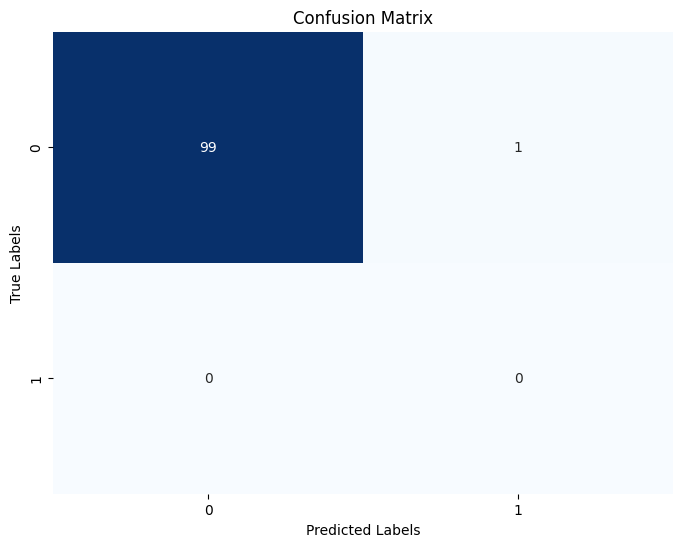

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
